# Klasyfikacja zbioru CIFAR-10 - model funkcjonalny API


In [1]:
from keras.datasets import cifar10

from keras import models
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

**Przygotowanie danych**

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
y_test = test_labels
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels.shape)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels.shape)

Train dataset
(50000, 32, 32, 3)
50000
(50000, 1)
Test dataset
(10000, 32, 32, 3)
10000
(10000, 1)


*   Zbiór CIFAR-10 składa się z  60000 kolorowych obrazów o wymiarach 32×32 w 10 klasach
*   Zbiór treningowy składa się z 50000 obrazów
*   Zbiór testowy składa się z 10000 obrazów

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [13]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)


x = Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.5)(x)

#x = Flatten()(x) #dodane nic nie zmienia
x = Dense(10)(x)
output_layer = Activation('softmax')(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0   



*   Sieć przetwarza obiekty wejściowe o rozmiarze (32, 32, 3)
*   Liczba kanałów - 32
*   Wysokość i szerkość zmniejszają się wraz z warstwami sieci
*   Flatten - spłaszczamy sieć do jednowymiarowgo tensora
*   Conv2D - tworzy sieć konwolucyjną
*   BatchNormalization - normalizuje wejścia, sieć działa szybciej
*   MaxPooling2D - zmniejsza cechy o połowę, zmniejsza rozdzielczość bo kolejne wartwy mają coraz to większe okna


In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=64, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
782/782 [==============================] - 11s 10ms/step - loss: 2.1162 - accuracy: 0.3269 - val_loss: 1.3917 - val_accuracy: 0.4955
Epoch 2/15
782/782 [==============================] - 6s 7ms/step - loss: 1.3129 - accuracy: 0.5378 - val_loss: 1.7560 - val_accuracy: 0.4406
Epoch 3/15
782/782 [==============================] - 6s 7ms/step - loss: 1.1567 - accuracy: 0.5948 - val_loss: 1.4865 - val_accuracy: 0.4964
Epoch 4/15
782/782 [==============================] - 6s 7ms/step - loss: 1.1002 - accuracy: 0.6196 - val_loss: 0.9949 - val_accuracy: 0.6578
Epoch 5/15
782/782 [==============================] - 6s 7ms/step - loss: 1.0397 - accuracy: 0.6447 - val_loss: 1.0801 - val_accuracy: 0.6282
Epoch 6/15
782/782 [==============================] - 6s 7ms/step - loss: 1.0258 - accuracy: 0.6517 - val_loss: 1.3748 - val_accuracy: 0.5507
Epoch 7/15
782/782 [==============================] - 6s 7ms/step - loss: 0.9986 - accuracy: 0.6591 - val_loss: 1.2475 - val_accuracy: 0.5782
Epoc

**Sprawdzenie modelu**

In [10]:
#cifar10_model = models.load_model('cifar10model.h5')

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8139 - accuracy: 0.7228
Test Loss 0.8139477372169495
Test Accuracy 0.7228000164031982


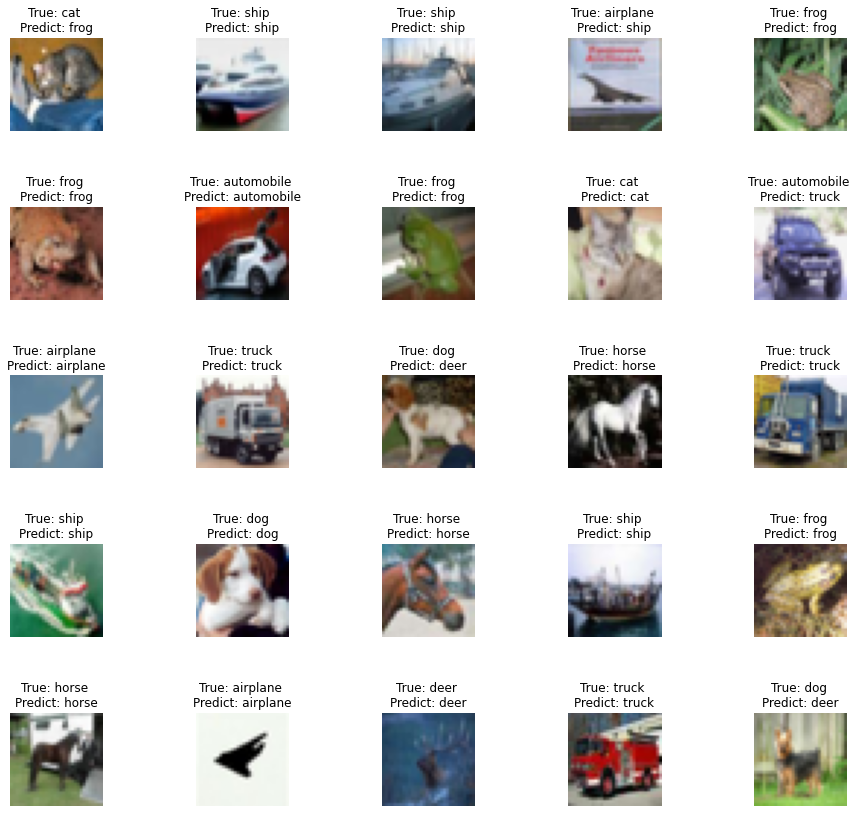

In [12]:
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)


fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)